## Course Project

***

## Project Description

In this project we will build a model to predict the electrical energy output of a Combined Cycle Power Plant, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

## Data sources used

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

## Business Task

To complete the project, you must complete each of the below steps in the modeling process.  

- For the problem described in the Project Topic section above, determine what type of machine learning approach is needed and select an appropriate output metric to evaluate performance in accomplishing the task.

- Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.

- Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.

- Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

- Evaluate the performance of your final model using the output metric you defined earlier.  

## Summary

## Recommendation for Action

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn

import shap
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats

#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("CCPP_data.csv")

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe(include='all')

,AT,V,AP,RH,PE
count,9568.00,9568.00,9568.00,9568.00,9568.00
mean,19.65,54.31,1013.26,73.31,454.37
std,7.45,12.71,5.94,14.60,17.07
min,1.81,25.36,992.89,25.56,420.26
25%,13.51,41.74,1009.10,63.33,439.75
50%,20.34,52.08,1012.94,74.97,451.55
75%,25.72,66.54,1017.26,84.83,468.43
max,37.11,81.56,1033.30,100.16,495.76


In [6]:
df.shape

(9568, 5)

In [7]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

## Data Visualization

### Univariate Data Exploration

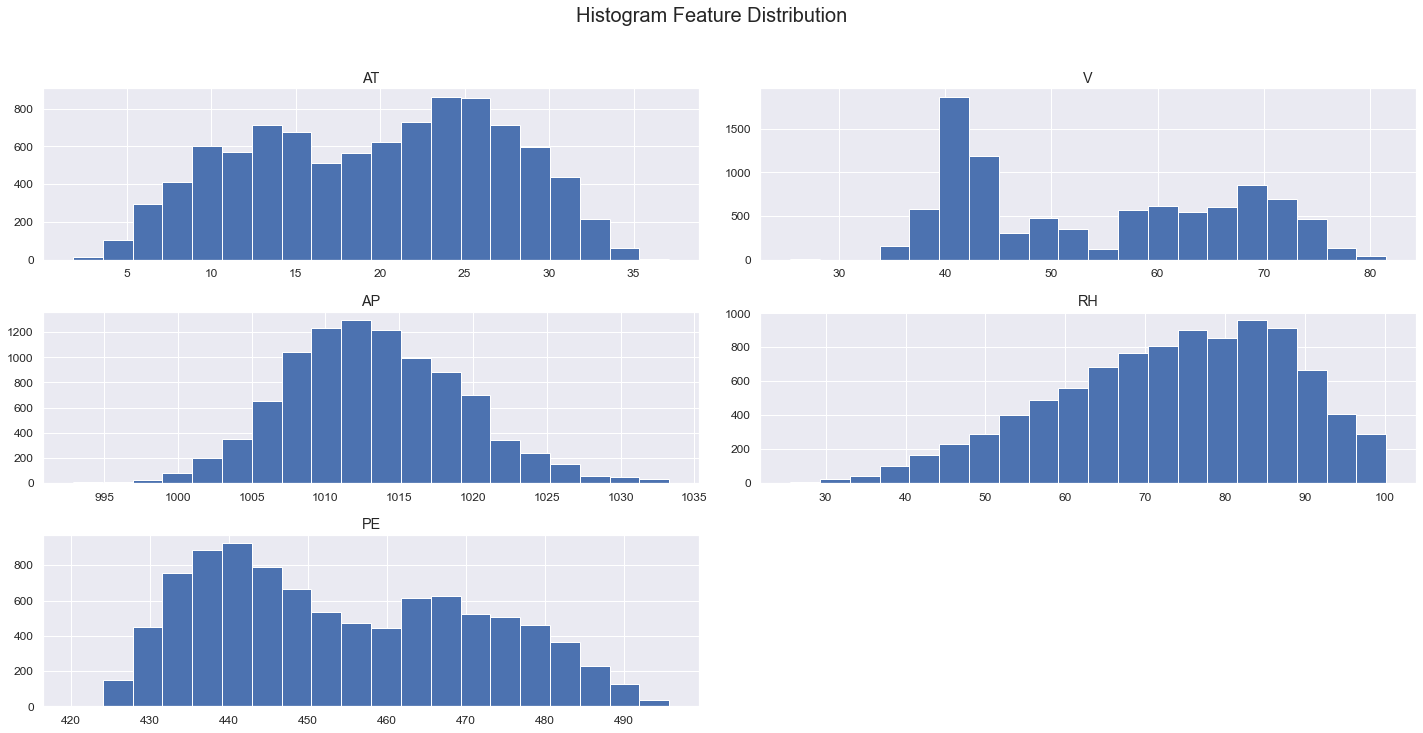

In [8]:
df.hist(bins=20, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

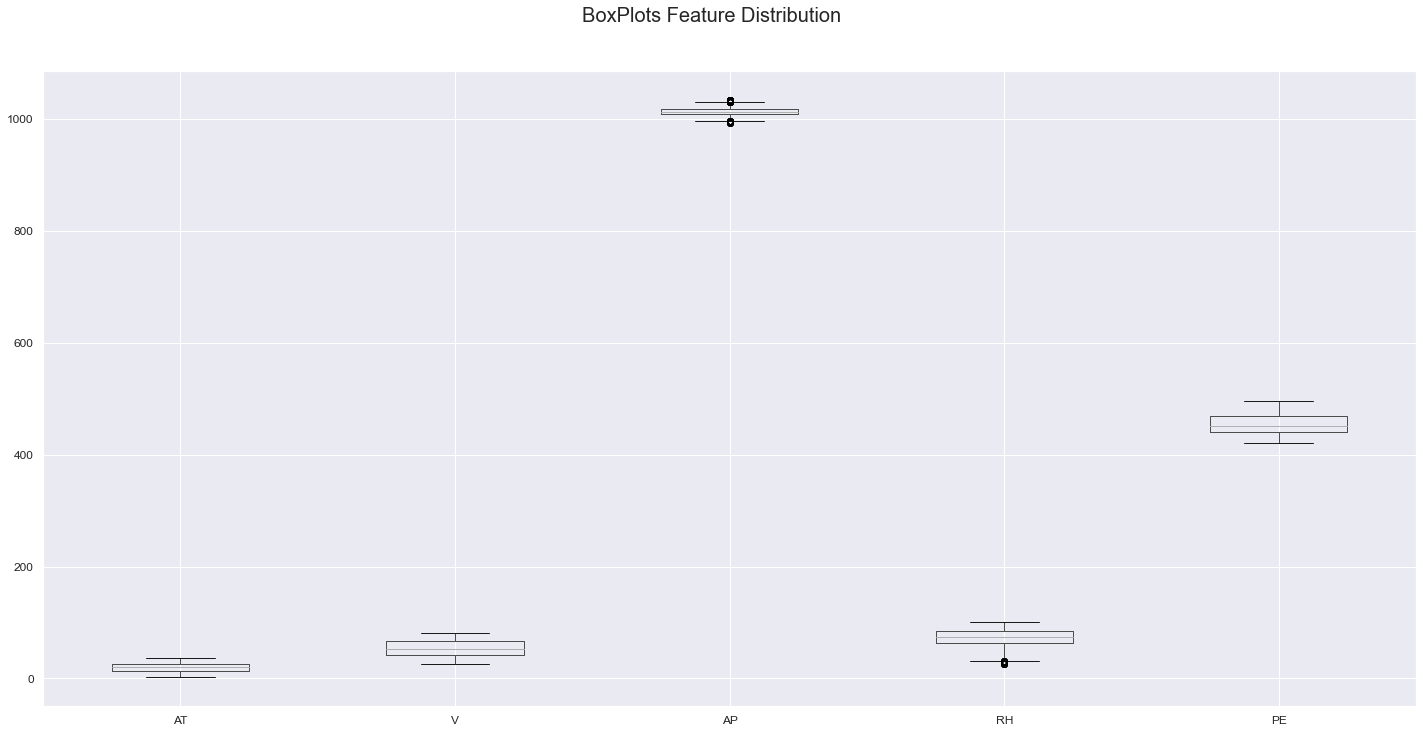

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [10]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

### Regression plot

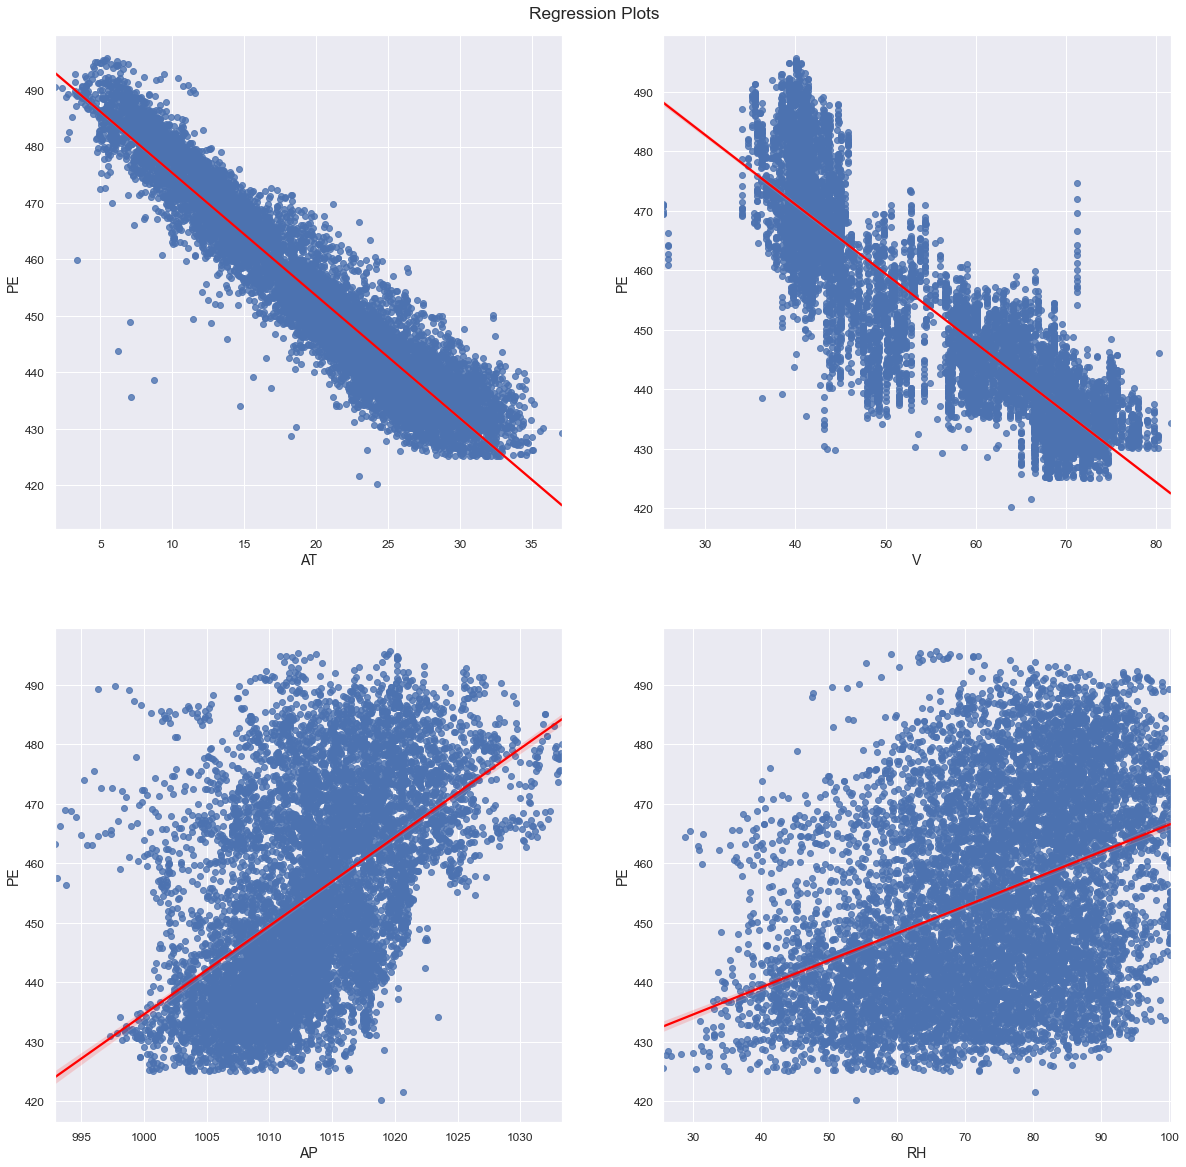

In [11]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

plt.suptitle("Regression Plots", y=0.9)

ax1 = sns.regplot(x=df.AT, y=df.PE, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("AT")
ax1.set_ylabel("PE")




ax2 = sns.regplot(x=df.V, y=df.PE, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("V")
ax2.set_ylabel("PE")




ax3 = sns.regplot(x=df.AP, y=df.PE, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("AP")
ax3.set_ylabel("PE")



ax4 = sns.regplot(x=df.RH, y=df.PE, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("RH")
ax4.set_ylabel("PE")

plt.show()

### Correlation

In [12]:
df.corr()

,AT,V,AP,RH,PE
AT,1.00,0.84,-0.51,-0.54,-0.95
V,0.84,1.00,-0.41,-0.31,-0.87
AP,-0.51,-0.41,1.00,0.10,0.52
RH,-0.54,-0.31,0.10,1.00,0.39
PE,-0.95,-0.87,0.52,0.39,1.00


In [13]:
df.corr()["PE"].sort_values()

AT   -0.95
V    -0.87
RH    0.39
AP    0.52
PE    1.00
Name: PE, dtype: float64

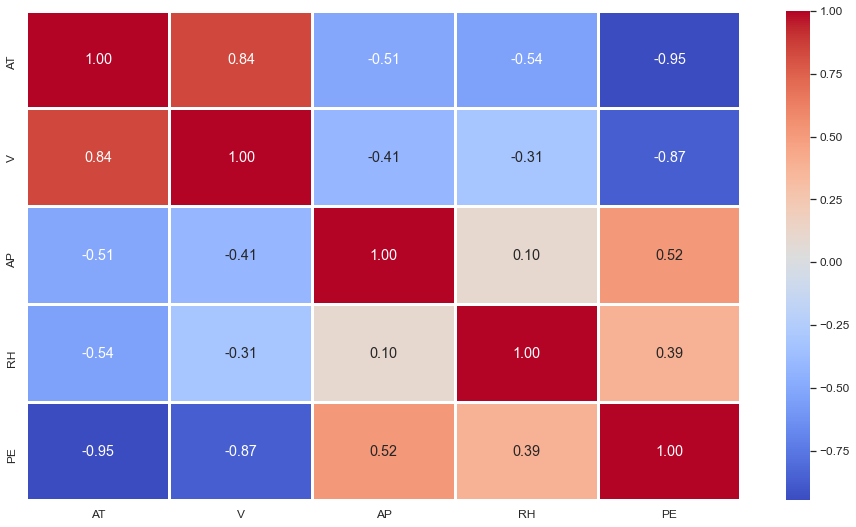

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

### Treat Missing Values

In [15]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### Treat Duplicate Values

In [16]:
df.duplicated(keep='first').sum()

41

In [17]:
df[df.duplicated(keep=False)] #Check duplicate values

,AT,V,AP,RH,PE
231,26.85,75.60,1017.43,74.55,433.48
345,12.19,41.17,1019.43,65.47,475.64
352,25.56,75.60,1017.37,69.31,442.20
468,25.21,75.60,1017.19,69.84,445.84
726,28.41,75.60,1018.48,56.07,440.28
806,6.86,41.17,1020.12,79.14,490.23
1186,6.06,41.17,1019.67,84.70,489.62
1291,27.54,75.60,1018.26,57.89,440.87
1482,12.11,41.17,1019.46,62.59,475.53
1551,8.57,41.17,1020.18,72.47,484.20


In [18]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [19]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9522,16.65,49.69,1014.01,91.00,460.03
9523,13.19,39.18,1023.67,66.78,469.62
9524,31.32,74.33,1012.92,36.48,429.57
9525,24.48,69.45,1013.86,62.39,435.74


### Treat Data Types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


### Create and save processed dataset

In [21]:
df.to_csv("train.csv",index=False)

In [22]:
df = pd.read_csv("train.csv")

### Train Test Split

In [23]:
df.shape

(9527, 5)

In [24]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [25]:
X.values, y.values

(array([[  14.96,   41.76, 1024.07,   73.17],
        [  25.18,   62.96, 1020.04,   59.08],
        [   5.11,   39.4 , 1012.16,   92.14],
        ...,
        [  31.32,   74.33, 1012.92,   36.48],
        [  24.48,   69.45, 1013.86,   62.39],
        [  21.6 ,   62.52, 1017.23,   67.87]]),
 array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28]))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7621, 4), (1906, 4), (7621,), (1906,))

## Model Training

### Using PyCaret

In [28]:
exp_reg = setup(data = df, target = 'PE', session_id=0, normalize=True, train_size=0.8) 

,Description,Value
0,session_id,0
1,Target,PE
2,Original Data,"(9527, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7621, 4)"


In [29]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.4534,11.7674,3.4292,0.9597,0.0075,0.0054,0.5420
rf,Random Forest Regressor,2.4732,11.8066,3.4348,0.9595,0.0075,0.0055,0.8540
gbr,Gradient Boosting Regressor,2.9434,14.9044,3.8595,0.9489,0.0085,0.0065,0.3300
knn,K Neighbors Regressor,2.8715,15.2922,3.9090,0.9476,0.0086,0.0063,0.0240
lr,Linear Regression,3.6279,20.6829,4.5471,0.9291,0.0100,0.0080,1.1240
ridge,Ridge Regression,3.6281,20.6829,4.5471,0.9291,0.0100,0.0080,0.0160
lar,Least Angle Regression,3.6279,20.6829,4.5471,0.9291,0.0100,0.0080,0.0140
dt,Decision Tree Regressor,3.2500,22.0802,4.6981,0.9243,0.0103,0.0072,0.0260
lasso,Lasso Regression,4.0157,25.1587,5.0149,0.9138,0.0110,0.0088,0.0120
ada,AdaBoost Regressor,4.2072,27.6522,5.2562,0.9051,0.0115,0.0092,0.1200


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [30]:
model_selected = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3939,11.0286,3.3209,0.9637,0.0073,0.0053
1,2.4299,12.0808,3.4758,0.9569,0.0076,0.0053
2,2.4038,10.8314,3.2911,0.9621,0.0072,0.0053
3,2.3338,11.2210,3.3498,0.9602,0.0074,0.0051
4,2.4562,12.7730,3.5739,0.9550,0.0079,0.0054
5,2.2481,9.0835,3.0139,0.9707,0.0066,0.0050
6,2.3591,9.9472,3.1539,0.9653,0.0069,0.0052
7,2.5060,12.0158,3.4664,0.9593,0.0076,0.0055
8,2.5423,14.9321,3.8642,0.9489,0.0085,0.0056
9,2.3754,10.0221,3.1658,0.9661,0.0070,0.0052


In [31]:
print(model_selected)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)


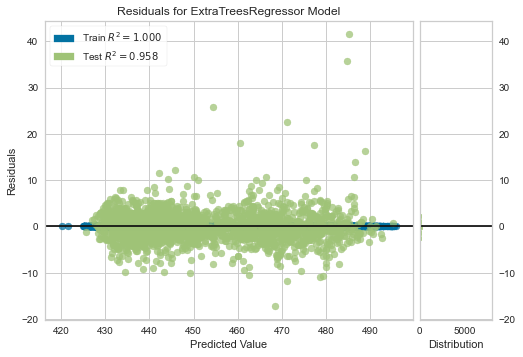

In [32]:
plot_model(model_selected, plot='residuals')

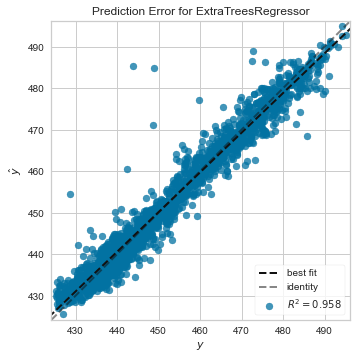

In [33]:
plot_model(model_selected, plot = 'error')

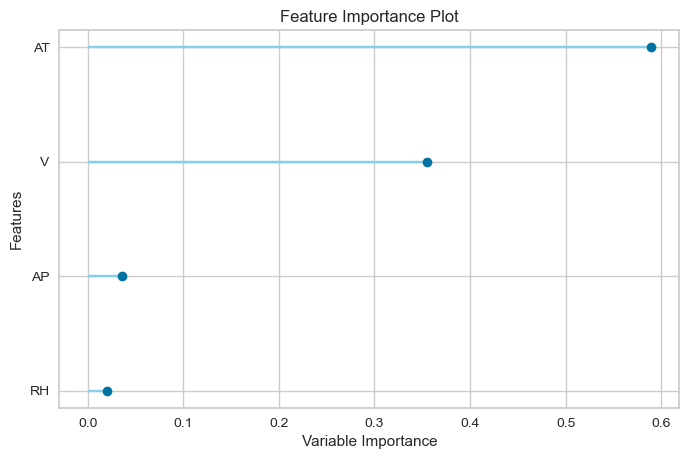

In [34]:
plot_model(model_selected, plot = 'feature')

In [36]:
predict_model(model_selected)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.3856,11.8113,3.4368,0.9583,0.0075,0.0053


,AT,V,AP,RH,PE,Label
0,-2.10,-1.13,-0.87,1.63,488.81,490.29
1,-0.68,-0.75,0.52,1.36,464.41,462.50
2,-0.18,-0.39,1.19,-0.79,454.66,457.22
3,1.57,1.72,-1.11,-0.65,430.36,434.37
4,-1.97,-1.10,-0.10,0.07,491.29,491.27
...,...,...,...,...,...,...
1901,1.16,1.30,-0.47,0.30,435.99,433.91
1902,0.62,0.28,-0.03,-0.22,446.87,444.92
1903,1.06,0.97,-1.30,-0.29,428.00,433.15
1904,1.32,1.33,-0.38,-1.34,430.50,432.58
